In [1]:
import pandas as pd
import json
from json import JSONDecodeError

In [2]:
from core.dao import QueryMaker

In [3]:
q = QueryMaker()

In [4]:
q.list_tables()

['gerenciador_dashboard',
 'auditoria_tabela',
 'conteudo',
 'estatistica_acesso',
 'fonte',
 'indicador',
 'indicador_resultado',
 'indicador_tema',
 'nivel_regiao',
 'parametro_sistema',
 'periodo',
 'regiao',
 'tema',
 'tipo_conteudo',
 'tipo_origem',
 'tipo_periodo',
 'tipo_situacao',
 'tipo_unidade_medida',
 'variavel',
 'variavel_indicador',
 'variavel_resultado']

In [5]:
variaveis = q('variavel', limit=None)

In [6]:
variaveis.keys()

Index(['cd_variavel', 'nm_resumido_variavel', 'nm_completo_variavel',
       'dt_atualizacao', 'cd_operador', 'cd_fonte', 'cd_tipo_situacao',
       'nm_apelido_variavel', 'dc_periodo_atualizacao', 'in_variavel_basica',
       'dc_unidade_variavel', 'dc_periodicidade_variavel',
       'dc_unidade_territorial', 'dc_serie_historica', 'dc_nota_tecnica',
       'dc_observacao_variavel', 'tx_fonte_variavel'],
      dtype='object')

In [7]:
q('tipo_situacao')

,cd_tipo_situacao,dc_tipo_situacao,dt_atualizacao,cd_operador
0,1,ATIVO,2018-11-30 15:36:38,21433
1,2,INATIVO,2018-11-30 15:36:38,21433
2,3,EXCLUIDO,2018-11-30 15:36:38,21433


In [8]:
variaveis = variaveis[variaveis['cd_tipo_situacao']==1].copy().reset_index(drop=True)

In [9]:
colunas = ['cd_variavel', 'nm_resumido_variavel', 'nm_completo_variavel',
       'dt_atualizacao', 'tx_fonte_variavel', 'cd_tipo_situacao', 'dc_unidade_territorial']

In [10]:
variaveis = variaveis[colunas].copy()

In [11]:
variaveis['cd_tipo_situacao'].unique()

array([1], dtype=int64)

In [12]:
variaveis.drop('cd_tipo_situacao', axis=1, inplace=True)

In [13]:
variaveis.head()

,cd_variavel,nm_resumido_variavel,nm_completo_variavel,dt_atualizacao,tx_fonte_variavel,dc_unidade_territorial
0,623,V0581,Iniciativas reconhecidas - promoção da inclusã...,2022-01-04 12:35:22.375697,Secretaria Municipal de Direitos Humanos e Cid...,Município
1,192,V0151,Valor liquidado no orçamento da Prefeitura Mun...,2021-12-16 11:20:38.630103,Secretaria Municipal da Fazenda (SMF),Município
2,752,V0710,Adolescentes cumprindo medidas socioeducativas,2022-01-17 13:43:30.992192,Secretaria Municipal de Assistência e Desenvol...,Município
3,731,V0689,Número de setores com risco hidrológico alto (...,2023-07-11 15:15:02.905933,Secretaria Municipal de Segurança Urbana (SMSU...,Município
4,753,V0711,Estrangeiros acolhidos na rede socioassistenci...,2022-01-17 13:55:15.038445,Secretaria Municipal de Assistência e Desenvol...,Município


In [14]:
def fonte_as_txt(val):
    
    if pd.isnull(val):
        return ''
    try:
        fonte_arr = json.loads(val)
    except JSONDecodeError:
        val = val.strip()
        if len(val)>1:
            return val
    fonte_arr = json.loads(val)
    noms = [fonte['nm_fonte'] for fonte
            in fonte_arr if fonte.get('nm_fonte')]
    
    return '; '.join(noms)

In [15]:
variaveis['tx_fonte_variavel'] = variaveis['tx_fonte_variavel'].apply(fonte_as_txt)

In [16]:
variaveis['tx_fonte_variavel'].unique()[:10]

array(['Secretaria Municipal de Direitos Humanos e Cidadania (SMDHC)',
       'Secretaria Municipal da Fazenda (SMF)',
       'Secretaria Municipal de Assistência e Desenvolvimento Social (SMADS)',
       'Secretaria Municipal de Segurança Urbana (SMSU); Coordenação Municipal de Defesa Civil (COMDEC); Divisão de Prevenção (DPREV)',
       'Secretaria Municipal de Cultura (SMC); Coordenadoria do Sistema Municipal de Bibliotecas (CSMB)',
       'Secretaria Municipal de Mobilidade e Trânsito (SMT); Companhia de Engenharia de Tráfego (CET); Gestão Urbana SP - Secretaria Municipal de Urbanismo e Licenciamento (SMUL); Câmara Municipal de São Paulo (CMSP)',
       'Fundação Sistema Estadual de Análise de Dados (SEADE)',
       'Secretaria Municipal do Verde e Meio Ambiente (SVMA); CEA - UMAPAZ',
       'Secretaria de Segurança Pública (SSP); Secretaria Municipal de Direitos Humanos e Cidadania (SMDHC)',
       'Pesquisa Origem-Destino Metrô SP; Secretaria Municipal de Mobilidade e Trânsito (S

In [17]:
indi = q('indicador', limit=None)

In [18]:
indi.keys()

Index(['cd_indicador', 'nm_indicador', 'dc_formula_indicador',
       'dc_conceito_indicador', 'dc_interpretacao_indicador',
       'dc_nota_tecnica', 'in_visibilidade', 'cd_tipo_situacao',
       'dt_atualizacao', 'cd_operador', 'cd_tipo_unidade_medida', 'cd_fonte',
       'nm_completo_indicador', 'dc_periodicidade_indicador',
       'dc_unidade_territorial', 'dc_serie_historica', 'dc_tag_indicador',
       'dc_observacao_indicador', 'tx_fonte_indicador',
       'in_consideracao_regiao'],
      dtype='object')

In [19]:
indi=indi[indi['cd_tipo_situacao']==1].reset_index(drop=True)

In [20]:
nom_vars = set(variaveis['nm_resumido_variavel'])
mapeamento_formulas = {}

for i, row in indi.iterrows():
    formula = row['dc_formula_indicador'] 
    formula = json.loads(formula)
    for item in formula:
        var_name = item.get('caractere')
        if var_name in nom_vars:
            if var_name not in mapeamento_formulas:
                mapeamento_formulas[var_name] = []
            mapeamento_formulas[var_name].append(str(row['cd_indicador']))
        
for var_name, indis in mapeamento_formulas.items():
    
    mapeamento_formulas[var_name] = '; '.join(indis)

In [21]:
variaveis['indicadores'] = variaveis['nm_resumido_variavel'].apply(lambda x:
                                                          mapeamento_formulas.get(x, ''))

In [22]:
results = q('variavel_resultado', limit=None)

In [23]:
results.sample(5)

,cd_sequencia_variavel_resultado,cd_periodo,cd_variavel,cd_regiao,cd_tipo_situacao,cd_tipo_origem,vl_variavel_resultado,dt_atualizacao,cd_do_operador
44893,139025,41,593,46,1,1,42829.0000,2021-10-19 12:24:12.263852,None
177258,176655,28,475,176,1,1,649.0000,2023-04-03 11:56:59.901308,None
180824,156931,37,477,191,1,1,4011.0000,2023-04-03 14:16:33.598237,None
15040,69316,35,344,191,1,1,25938.0000,2022-10-27 12:11:53.110042,None
116383,119535,40,128,19,1,1,23716.0000,2020-11-24 12:09:49.312861,None


In [24]:
periodos = q('periodo', limit=None)

In [25]:
periodos.head()

,cd_periodo,vl_periodo,cd_tipo_periodo,cd_tipo_situacao,dt_atualizacao,cd_operador
0,1,1980,1,1,2018-01-01 00:00:00.000000,SJ2234
1,2,1981,1,1,2018-01-01 00:00:00.000000,SJ2234
2,3,1982,1,1,2019-04-10 15:35:55.000020,t010001
3,4,1983,1,1,2019-04-10 15:35:55.000030,t010001
4,5,1984,1,1,2019-04-10 15:35:55.000040,t010001


In [26]:
periodos = periodos[periodos['cd_tipo_situacao']==1].reset_index(drop=True)

In [27]:
de_para_periodos = dict(zip(periodos['cd_periodo'], periodos['vl_periodo']))

In [28]:
mapper_ultimo_periodo = {}

for i, row in variaveis.iterrows():
    
    cd_variavel = row['cd_variavel']
    
    temp_df = results[results['cd_variavel']==cd_variavel].copy()
    temp_df['periodo_num'] = temp_df['cd_periodo'].apply(lambda x: 
                                                         de_para_periodos.get(x, -1))
    temp_df['periodo_num'] = temp_df['periodo_num'].astype(int)
    
    last_period = temp_df['periodo_num'].max()
    
    mapper_ultimo_periodo[cd_variavel] = last_period

In [29]:
variaveis['ultimo_periodo_atualizado'] = variaveis['cd_variavel'].apply(lambda x:
                                                                       mapper_ultimo_periodo.get(x))

In [30]:
variaveis.sample(5)

,cd_variavel,nm_resumido_variavel,nm_completo_variavel,dt_atualizacao,tx_fonte_variavel,dc_unidade_territorial,indicadores,ultimo_periodo_atualizado
248,782,V0738,Área total de parques naturais municipais e de...,2022-02-01 15:54:48.928966,SVMA / CPA/ DIA,Município,689,2022.0
731,579,V0537,Número de Organizações da Sociedade Civil no C...,2022-11-25 12:15:31.645246,Secretaria Municipal de Gestão (SEGES),Município,520,2021.0
483,674,V0632,Número de caminhões envolvidos em acidentes fa...,2022-01-04 16:39:40.055686,Companhia de Engenharia de Tráfego (CET); Secr...,Município,592,2022.0
12,827,V0783,Deslocamentos motorizados - pesquisa OD,2022-03-21 11:37:41.653437,Pesquisa Origem-Destino Metrô SP; Secretaria M...,Município,729,2017.0
434,629,V0587,Crimes fatais - mulheres,2022-01-04 12:40:53.077281,Secretaria de Segurança Pública (SSP); Secreta...,Município,,2022.0


In [31]:
variaveis['ultimo_periodo_atualizado'].unique()

array([2020., 2022., 2021., 2019., 2017., 2014., 2010., 2015., 2023.,
       2018., 2016.,   nan, 2030.])

<AxesSubplot: >

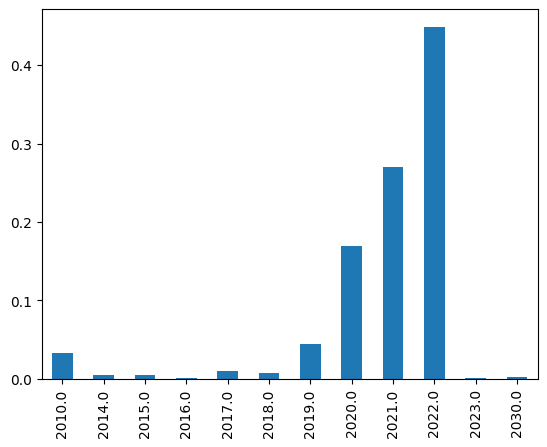

In [32]:
variaveis['ultimo_periodo_atualizado'].value_counts(normalize=True).sort_index().plot.bar()

In [33]:
indi['dc_periodicidade_indicador'].unique()

array(['Anual', 'Anual.', 'anual', 'Decenal', 'Bienal', None, 'Varia.',
       'Quinquenal.', 'Indefinido.', 'Anual\r\n', 'Mensal', 'Quinquenal',
       'Anual ', '\r\nAnual', 'Depende'], dtype=object)

In [34]:
def padronizar_periodicidade(serie:str):
    
    if serie is None:
        return None
    
    mapper = {
        #como os dados sao anuais, mensal atual como se fosse anual
        'mensal' : 1,
        'anual' : 1,
        'bienal' : 2,
        'quinquenal' : 5,
        'decenal' : 10,
    }
    
    for key, val in mapper.items():
        if key in serie.lower():
            return val
    else:
        return None
    
    

In [35]:
indi['periodicidade_padrao'] = indi['dc_periodicidade_indicador'].apply(padronizar_periodicidade)

<AxesSubplot: >

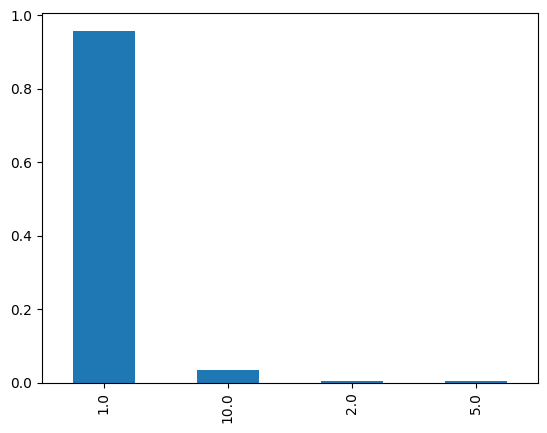

In [36]:
indi['periodicidade_padrao'].value_counts(normalize=True).plot.bar()

In [37]:
indi['dc_serie_historica'].unique()

array(['Início: 2013 - Término: 2014', 'Inicio: 2006 - atualmente',
       'Início: 2016 - Atualmente.', 'início: 2008 - atualmente',
       'Início: 2018 - Atualmente', 'Início: 2013 - atualmente',
       'Início: 2006 - 2015', 'Inicio: 2014 - atualmente',
       'Início: 2010 - atualmente', '2018', 'Início; 2010 - Atualmente',
       'Início: 2012 - atualmente', 'Início: 2013 - Atualmente.',
       'Início: 2015 - Atualmente', 'Início: 2015 - Atualmente.',
       'Início: 2000/2010 - atualmente', 'Início: 2011 - atualmente',
       'Início: 2009 - atualmente', 'Início: 2006 - Atualmente',
       '2000 e 2010', 'Início: 2000 - Atualmente.',
       'Início: 2003 - Atualmente.', '2010', 'Início: 2008 - Atualmente',
       'Início: 1996 - Atualmente', 'Início: 2016 - Atualmente',
       'Início: 2005 - atualmente', 'Início: 2005 - Atualmente',
       'Início: 2012 - Atualmente', 'Início: 2011 - Atualmente',
       'Inicio: 2012 - atualmente', 'Início: 2008 - atual',
       'Início: 2015 

In [38]:
fname = 'report_variaveis.xlsx'

In [39]:
variaveis.to_excel(fname, index=False)